'''<br>
    @Author: Deven Gupta<br>
    @Date: 11-09-2024<br>
    @Last Modified by: Deven Gupta<br>
    @Last Modified time: 11-09-2024 <br>
    @Title : Python program to perform CRUD Operation in S3 using Boto3<br>
    <br>
'''

In [1]:
%pip install boto3

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import boto3
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()

True

## CRUD operation using BOTO3

In [4]:
s3_client = boto3.client('s3')

## 1. CREATE Operation

In [14]:
# 1. Create a Bucket

response = s3_client.create_bucket(
    ACL='private',
    Bucket='deven-boto-bucket-crud',
    CreateBucketConfiguration={
        'LocationConstraint': 'us-west-2'
        }
)

In [15]:
response

{'ResponseMetadata': {'RequestId': 'FMY1R38MYHBXYTMV',
  'HostId': 'PjVbu90KnIuy+fbWR5aIDbXV4ihag0RjsLNfQaln7zulHMoK157O+WNsFLUsSigUXQGsut+pKN8=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'PjVbu90KnIuy+fbWR5aIDbXV4ihag0RjsLNfQaln7zulHMoK157O+WNsFLUsSigUXQGsut+pKN8=',
   'x-amz-request-id': 'FMY1R38MYHBXYTMV',
   'date': 'Wed, 11 Sep 2024 06:18:22 GMT',
   'location': 'http://deven-boto-bucket-crud.s3.amazonaws.com/',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'Location': 'http://deven-boto-bucket-crud.s3.amazonaws.com/'}

In [24]:
os.listdir()

['.env',
 'boto3_s3.ipynb',
 'demo.txt',
 'local_file.txt',
 'user-deven_accessKeys.csv']

In [39]:
# 2. Upload a File

s3_client.upload_file('local_file.txt', 'deven-boto-bucket-crud', 'remote_file.txt')

In [25]:
s3_client.upload_file('demo.txt', 'deven-boto-bucket-crud', 'demo.txt')

In [27]:
s3_client.upload_file('1.jpg', 'deven-boto-bucket-crud', '1.jpg')

## 2. Read Operation

In [17]:
# 1. List Buckets

response = s3_client.list_buckets()
buckets = response['Buckets']

for bucket in buckets:
    print(bucket['Name'])

deven-boto-bucket-crud


In [28]:
# 2. List Objects in a Bucket

response = s3_client.list_objects_v2(Bucket='deven-boto-bucket-crud')
objects = response.get('Contents', [])

for obj in objects:
    print(obj['Key'])


1.jpg
demo.txt
remote_file.txt


In [29]:
# 3. Download a File

s3_client.download_file('deven-boto-bucket-crud', 'remote_file.txt', 'file_downloaded.txt')

In [30]:
os.listdir()

['.env',
 '1.jpg',
 'boto3_s3.ipynb',
 'demo.txt',
 'file_downloaded.txt',
 'local_file.txt',
 'user-deven_accessKeys.csv']

## 3. Update Operation

In [36]:
# 1. Copy an Object

s3_client.copy_object(
    CopySource={'Bucket': 'deven-boto-bucket-crud', 'Key': 'demo.txt'},
    Bucket='deven-boto-bucket-crud',
    Key='demo_updated.txt'
)

# Note If add a same file with updated content in that then it will overwrite the file

{'ResponseMetadata': {'RequestId': 'Y1EJ39C7DM4795H4',
  'HostId': 'zDfjPz1xsiu72IuZ31VjMQNCbUq8HaXniWykw6qTtn7YijgVP//0JyC0kz8OaZsWtBnODUojW88=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'zDfjPz1xsiu72IuZ31VjMQNCbUq8HaXniWykw6qTtn7YijgVP//0JyC0kz8OaZsWtBnODUojW88=',
   'x-amz-request-id': 'Y1EJ39C7DM4795H4',
   'date': 'Wed, 11 Sep 2024 07:56:04 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'content-type': 'application/xml',
   'server': 'AmazonS3',
   'content-length': '224'},
  'RetryAttempts': 0},
 'ServerSideEncryption': 'AES256',
 'CopyObjectResult': {'ETag': '"29eb1b6a88c37d5968572170e8e7a4c4"',
  'LastModified': datetime.datetime(2024, 9, 11, 7, 56, 4, tzinfo=tzutc())}}

## 4. Delete Operation

In [38]:
# 1. Delete an Object

s3_client.delete_object(Bucket='deven-boto-bucket-crud', Key='remote_file.txt')

{'ResponseMetadata': {'RequestId': '81ZCG9QW0TEMHHTB',
  'HostId': 'aWv4U51tm/lro7aENgz/8IudfGP1WUgbN29O1Qgeh/0w6bp6yB82fZ6sQzJd0e4IOfTLYonzdLA=',
  'HTTPStatusCode': 204,
  'HTTPHeaders': {'x-amz-id-2': 'aWv4U51tm/lro7aENgz/8IudfGP1WUgbN29O1Qgeh/0w6bp6yB82fZ6sQzJd0e4IOfTLYonzdLA=',
   'x-amz-request-id': '81ZCG9QW0TEMHHTB',
   'date': 'Wed, 11 Sep 2024 08:00:04 GMT',
   'server': 'AmazonS3'},
  'RetryAttempts': 0}}

In [5]:
# 2. Delete Bucket

# First, delete all objects in the bucket
response = s3_client.list_objects_v2(Bucket='deven-boto-bucket-crud')
objects = response.get('Contents', [])

for obj in objects:
    s3_client.delete_object(Bucket='deven-boto-bucket-crud', Key=obj['Key'])

# Now delete the bucket
s3_client.delete_bucket(Bucket='deven-boto-bucket-crud')


## SCREENSHOTS


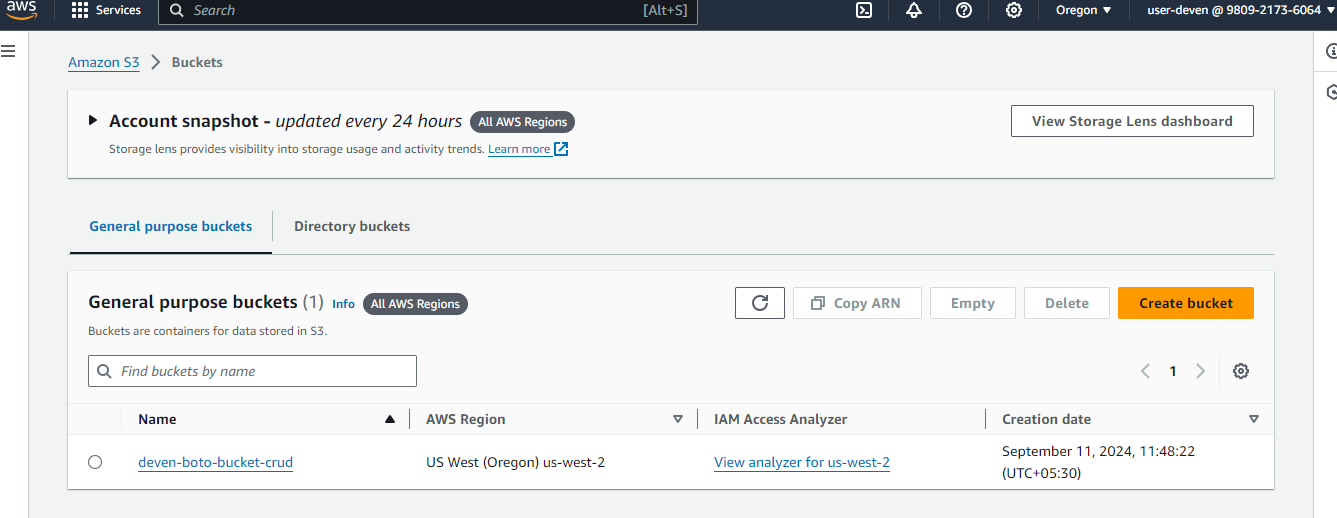

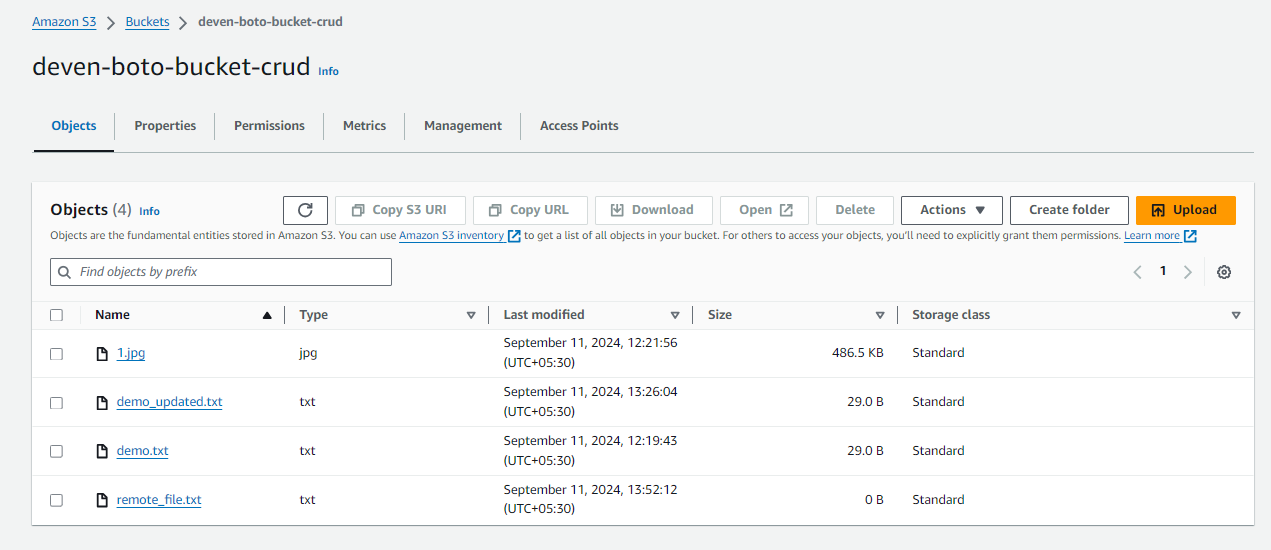